# Building the model for the Spam Detector

In this project we will use a dataset from Kaggle to create a classifier model to detect when an email is a spam detector or not.

For this project we will use some tools from sklearn and pycaret (AutoML) to test several aproaches for the problem

In [1]:
# Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.- EDA para el dataset

In [2]:
# importando el dataset
df = pd.read_csv('../data//raw/spam_ham_dataset.csv')

In [3]:
# ¿Qué tiene el dataset?
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
# ¿Cuántos datos tiene el dataset?
df.shape

(5171, 4)

In [5]:
# ¿Qué tipo de datos tiene el dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
# ¿Cuántos datos nulos tiene el dataset?
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [7]:
# ¿Cuántos datos duplicados tiene el dataset?
df.duplicated().sum()

0

In [8]:
# ¿Cuántos datos únicos tiene el dataset?
df.nunique()

Unnamed: 0    5171
label            2
text          4993
label_num        2
dtype: int64

In [9]:
# ¿Unnamed: 0 es la lontigud de cada elemento de text? No
df['Unnamed: 0'] == df['text'].apply(len) 

0       False
1       False
2       False
3       False
4       False
        ...  
5166    False
5167    False
5168    False
5169    False
5170    False
Length: 5171, dtype: bool

In [10]:
df["Unnamed: 0"][1], len(df["text"][1])

(2349, 97)

In [11]:
# ¿Unnamed: 0 es el índice del dataset? Sí
df = df.set_index('Unnamed: 0')

In [12]:
df.head()

,label,text,label_num
Unnamed: 0,,,
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [13]:
# ¿Cuál es la distribución de los datos?
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [14]:
df['label'].value_counts(normalize=True)

ham     0.710114
spam    0.289886
Name: label, dtype: float64

<AxesSubplot: >

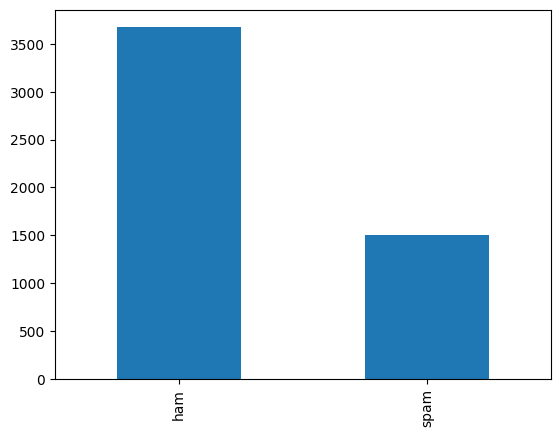

In [15]:
df["label"].value_counts().plot(kind='bar')
# La distribución de los datos es desbalanceada

# 2.- Pre processing data

In [16]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


[nltk_data] Downloading package punkt to /home/pedro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pedro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
import re

def extract_alphanumeric(text):
    return " ".join(re.findall(r'\w+', text))


In [18]:
# Limpiando el texto
df_clean = df.copy()
df_clean['text'] = df_clean['text'].apply(lambda x: x.lower())
df_clean['text'] = df_clean['text'].apply(extract_alphanumeric)

In [19]:
df_clean['text']

Unnamed: 0
605     subject enron methanol meter 988291 this is a ...
2349    subject hpl nom for january 9 2001 see attache...
3624    subject neon retreat ho ho ho we re around to ...
4685    subject photoshop windows office cheap main tr...
2030    subject re indian springs this deal is to book...
                              ...                        
1518    subject put the 10 on the ft the transport vol...
404     subject 3 4 2000 and following noms hpl can t ...
2933    subject calpine daily gas nomination julie as ...
1409    subject industrial worksheets for august 2000 ...
4807    subject important online banking alert dear va...
Name: text, Length: 5171, dtype: object

In [20]:
# tokenizando el texto
df_clean['text'] = df_clean['text'].apply(word_tokenize).apply(lambda x: ' '.join(x))

In [21]:
df_clean['text'][0]

'subject christmas tree farm pictures'

In [24]:
df_target = df_clean[['text','label_num']].copy()

In [25]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test datasets
X = df_target['text']
y = df_target['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [30]:
df_target_train = pd.concat([X_train, y_train], axis=1)
df_target_test = pd.concat([X_test, y_test], axis=1)

In [33]:
df_target_test.shape, df_target_train.shape

((1293, 2), (3878, 2))

# 3.- Chosing a model

,Description,Value
0,Session id,42
1,Target,label_num
2,Target type,Binary
3,Original data shape,"(5171, 2)"
4,Transformed data shape,"(5171, 2)"
5,Transformed train set shape,"(3878, 2)"
6,Transformed test set shape,"(1293, 2)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7171,0.5598,0.0344,1.0000,0.0660,0.0478,0.1518,0.4970
knn,K Neighbors Classifier,0.7171,0.5172,0.0344,1.0000,0.0660,0.0478,0.1518,0.0550
dt,Decision Tree Classifier,0.7171,0.5172,0.0344,1.0000,0.0660,0.0478,0.1518,0.0310
svm,SVM - Linear Kernel,0.7171,0.0000,0.0344,1.0000,0.0660,0.0478,0.1518,0.0270
ridge,Ridge Classifier,0.7171,0.0000,0.0344,1.0000,0.0660,0.0478,0.1518,0.0270
rf,Random Forest Classifier,0.7171,0.5172,0.0344,1.0000,0.0660,0.0478,0.1518,0.1450
ada,Ada Boost Classifier,0.7171,0.5172,0.0344,1.0000,0.0660,0.0478,0.1518,0.0290
gbc,Gradient Boosting Classifier,0.7171,0.5167,0.0344,1.0000,0.0660,0.0478,0.1518,0.0550
lda,Linear Discriminant Analysis,0.7171,0.5598,0.0344,1.0000,0.0660,0.0478,0.1518,0.0280
et,Extra Trees Classifier,0.7171,0.5598,0.0344,1.0000,0.0660,0.0478,0.1518,0.1320


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7165,0.5580,0.0351,1.0000,0.0678,0.0489,0.1582
1,0.7216,0.5661,0.0526,1.0000,0.1000,0.0728,0.1943
2,0.7113,0.5464,0.0175,1.0000,0.0345,0.0246,0.1116
3,0.7113,0.5536,0.0175,1.0000,0.0345,0.0246,0.1116
4,0.7191,0.5551,0.0439,1.0000,0.0840,0.0608,0.1771
5,0.7088,0.5460,0.0088,1.0000,0.0174,0.0123,0.0788
6,0.7268,0.5719,0.0619,1.0000,0.1167,0.0856,0.2115
7,0.7165,0.5504,0.0265,1.0000,0.0517,0.0372,0.1377
8,0.7183,0.5775,0.0354,1.0000,0.0684,0.0494,0.1591


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

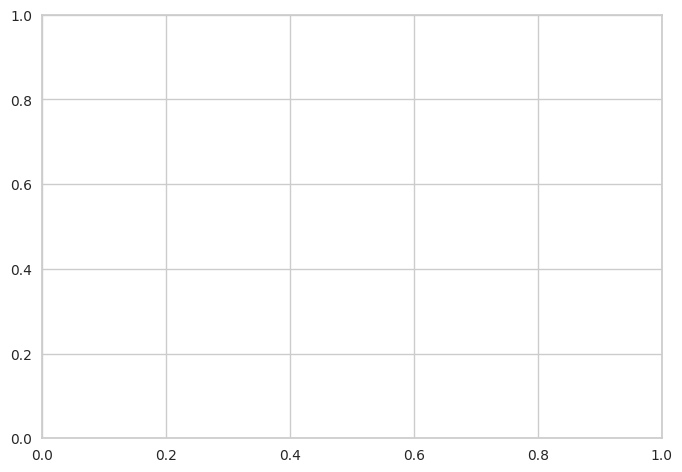

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

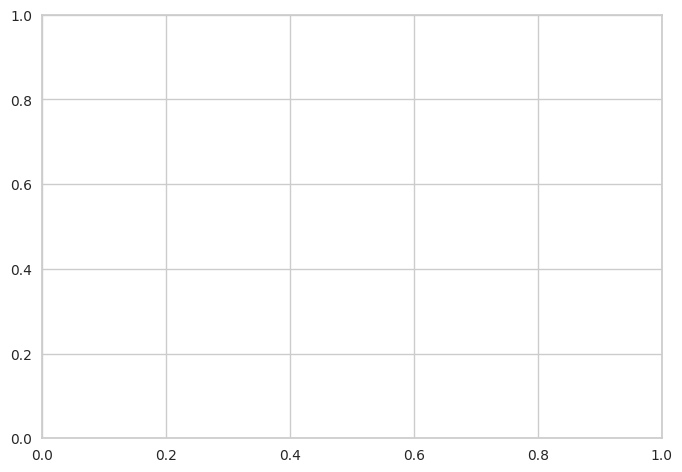

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

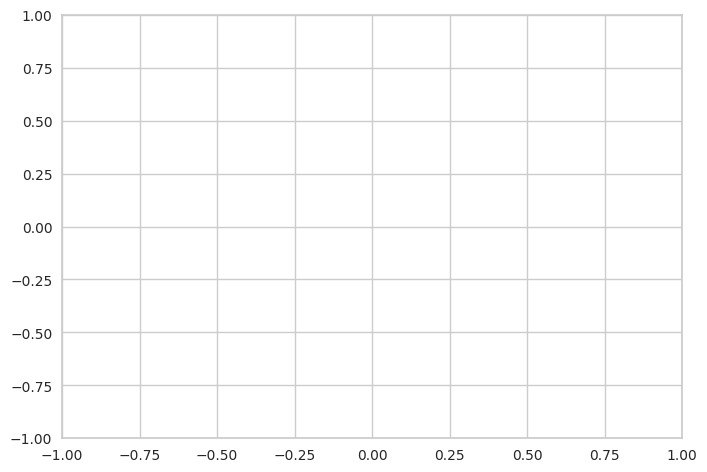

In [34]:
# Importing the necessary libraries
from pycaret.classification import *

# Creating a PyCaret experiment
exp_clf = setup(
    data=df_target_train,
    train_size=0.8,
    target='label_num',
    session_id=42,
    log_experiment=True,
    experiment_name='spam_classification',
    test_data=df_target_test
    )


# Entrenar varios modelos de clasificación utilizando train_data
best_model = compare_models(verbose=True)

# Tuning the best model
tuned_model = tune_model(best_model)

# Evaluating the tuned model
evaluate_model(tuned_model)

# Finalizing the tuned model
final_model = finalize_model(tuned_model)



In [35]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=['text'],
                                    transformer=...
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [36]:

# Saving the final model
save_model(final_model, '../models/spam_classification_model_rf_v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['text'],
                                     transformer=...
                                                               handle_unknown='value',
                             

# 4.- Mejorando los hyperparametros del modelo RF

In [37]:
df_target_test.head()

,text,label_num
Unnamed: 0,,
2924,subject hpl nom for march 30 2001 see attached...,0
3839,subject online pharxmacy 80 off all meds dissc...,1
3078,subject re nom actual volume for april 17 th w...,0
497,subject re meter 8740 dec 99 robert and i put ...,0
1287,subject re coastal oil gas corporation melissa...,0


In [47]:
t1 = df_target_test.iloc[0, 0]

In [50]:
res = final_model.predict(df_target_test[['text']])

In [61]:
# Para dataset de test el modelo tiene una precisión del 100%
df_target_test[df_target_test["label_num"] == res].value_counts().sum()

1293

In [60]:
df_target_test[df_target_test["label_num"] != res].value_counts().sum()

0

In [63]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 0.01],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a base model using create_model()
# base_model = create_model('lr')

# Tune the model using tune_model() and pass the parameter grid
tuned_model = tune_model(final_model, custom_grid=param_grid)

# Evaluate the tuned model
evaluate_model(tuned_model)


# Finalizar el modelo ajustado
rf_grid = finalize_model(tuned_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7165,0.5580,0.0351,1.0000,0.0678,0.0489,0.1582
1,0.7216,0.5661,0.0526,1.0000,0.1000,0.0728,0.1943
2,0.7113,0.5464,0.0175,1.0000,0.0345,0.0246,0.1116
3,0.7113,0.5536,0.0175,1.0000,0.0345,0.0246,0.1116
4,0.7191,0.5551,0.0439,1.0000,0.0840,0.0608,0.1771
5,0.7088,0.5460,0.0088,1.0000,0.0174,0.0123,0.0788
6,0.7268,0.5719,0.0619,1.0000,0.1167,0.0856,0.2115
7,0.7165,0.5504,0.0265,1.0000,0.0517,0.0372,0.1377
8,0.7183,0.5775,0.0354,1.0000,0.0684,0.0494,0.1591


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [73]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 0.01, 0.001, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None],
    'n_jobs': [10, 1000, -1],
    'max_iter': [1000, 100000]
}

# Create a base model using create_model()
base_model = create_model('lr')

# Tune the model using tune_model() and pass the parameter grid
tuned_model = tune_model(base_model, custom_grid=param_grid, n_iter=100, optimize='Accuracy')

# Evaluate the tuned model
evaluate_model(tuned_model)


# Finalizar el modelo ajustado
rf_grid_base = finalize_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7165,0.5580,0.0351,1.0000,0.0678,0.0489,0.1582
1,0.7216,0.5661,0.0526,1.0000,0.1000,0.0728,0.1943
2,0.7113,0.5464,0.0175,1.0000,0.0345,0.0246,0.1116
3,0.7113,0.5536,0.0175,1.0000,0.0345,0.0246,0.1116
4,0.7191,0.5551,0.0439,1.0000,0.0840,0.0608,0.1771
5,0.7088,0.5460,0.0088,1.0000,0.0174,0.0123,0.0788
6,0.7268,0.5719,0.0619,1.0000,0.1167,0.0856,0.2115
7,0.7165,0.5504,0.0265,1.0000,0.0517,0.0372,0.1377
8,0.7183,0.5775,0.0354,1.0000,0.0684,0.0494,0.1591


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7165,0.5580,0.0351,1.0000,0.0678,0.0489,0.1582
1,0.7216,0.5661,0.0526,1.0000,0.1000,0.0728,0.1943
2,0.7113,0.5464,0.0175,1.0000,0.0345,0.0246,0.1116
3,0.7113,0.5536,0.0175,1.0000,0.0345,0.0246,0.1116
4,0.7191,0.5551,0.0439,1.0000,0.0840,0.0608,0.1771
5,0.7088,0.5460,0.0088,1.0000,0.0174,0.0123,0.0788
6,0.7268,0.5719,0.0619,1.0000,0.1167,0.0856,0.2115
7,0.7165,0.5504,0.0265,1.0000,0.0517,0.0372,0.1377
8,0.7183,0.5775,0.0354,1.0000,0.0684,0.0494,0.1591


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Lo siguiente será cambiar la forma del procesamiento y en lugar de utilizar los tokens, comparar con una simple limpieza de caracteres raros y que el pipeline haga la limpieza